In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import re
import matplotlib.pyplot as plt
import datetime

# Task1
## Background
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region

The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year

In [2]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
transdata = pd.read_csv('QVI_transaction_data.csv')

In [3]:
print(purchase.head(),purchase.describe(),purchase.isnull().sum())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream        LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [4]:
transdata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9


In [5]:
print(transdata.describe(),transdata.isnull().sum())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [6]:
# convert DATE to date time 
po = transdata['DATE']
po = pd.Series.to_list(po)
po = pd.to_datetime(po,unit='D',origin=pd.Timestamp('1899-12-30'),)
po = po.to_frame(index=False, name='DATE')

In [7]:
transdata= transdata.drop(['DATE'],axis=1)
transdata = transdata.join(po)
transdata.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-16
2,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-07
3,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-08
4,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-02


In [8]:
prodname = transdata['PROD_NAME']
prodname.value_counts()
# there are total 114 products and need to find out chips products 

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [9]:
chips_prod = transdata[transdata['PROD_NAME'].str.contains('Salsa')]
print(chips_prod['PROD_NAME'].value_counts())
#find out those products are not chips

Old El Paso Salsa   Dip Chnky Tom Ht300g    3125
Old El Paso Salsa   Dip Tomato Med 300g     3114
Old El Paso Salsa   Dip Tomato Mild 300g    3085
Woolworths Mild     Salsa 300g              1491
Doritos Salsa Mild  300g                    1472
Smiths Crinkle Cut  Tomato Salsa 150g       1470
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Doritos Salsa       Medium 300g             1449
Woolworths Medium   Salsa 300g              1430
Name: PROD_NAME, dtype: int64


In [10]:
chips = transdata[~transdata.PROD_NAME.str.contains('Salsa')]
chips.info()
# remove all salsa products

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   STORE_NBR       246742 non-null  int64         
 1   LYLTY_CARD_NBR  246742 non-null  int64         
 2   TXN_ID          246742 non-null  int64         
 3   PROD_NBR        246742 non-null  int64         
 4   PROD_NAME       246742 non-null  object        
 5   PROD_QTY        246742 non-null  int64         
 6   TOT_SALES       246742 non-null  float64       
 7   DATE            246742 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [11]:
print(chips['PROD_QTY'].value_counts())
# there are two outlier (200) 
chips = chips[chips.PROD_QTY !=200] # remove outlier
chips = chips.astype(str)

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64


In [12]:
brand = chips['PROD_NAME'].str.extract('([a-zA-Z]+)', expand=False).str.strip()
print(brand.value_counts()) # list of product brands
chips['PROD_BRAND'] = chips['PROD_NAME'].str.extract('([a-zA-Z]+)', expand=False).str.strip()
print(brand.head())

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: PROD_NAME, dtype: int64
0    Natural
1        Red
2      Grain
3    Natural
4         WW
Name: PROD_NAME, dtype: object


In [13]:
chips['PROD_WEIGHT']=chips.PROD_NAME.str.findall('(\d+)').apply(''.join)
# extract product weight 
chips['PROD_WEIGHT']

0         175
1         150
2         210
3         175
4         160
         ... 
264830    380
264831    210
264832    150
264833    165
264835    330
Name: PROD_WEIGHT, Length: 246740, dtype: object

In [14]:
chips.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE,PROD_BRAND,PROD_WEIGHT
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,Natural,175
1,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-16,Red,150
2,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-07,Grain,210
3,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-08,Natural,175
4,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-02,WW,160


In [15]:
less = purchase.drop(['LYLTY_CARD_NBR'],axis=1)
both = less.join(chips)

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

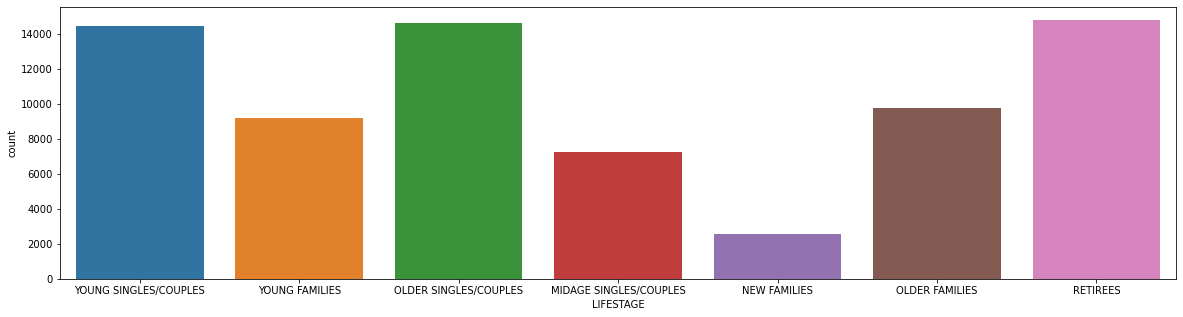

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(x='LIFESTAGE',data=both)
# young single/couple, older single/couple and retures are highest category on buying chips

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

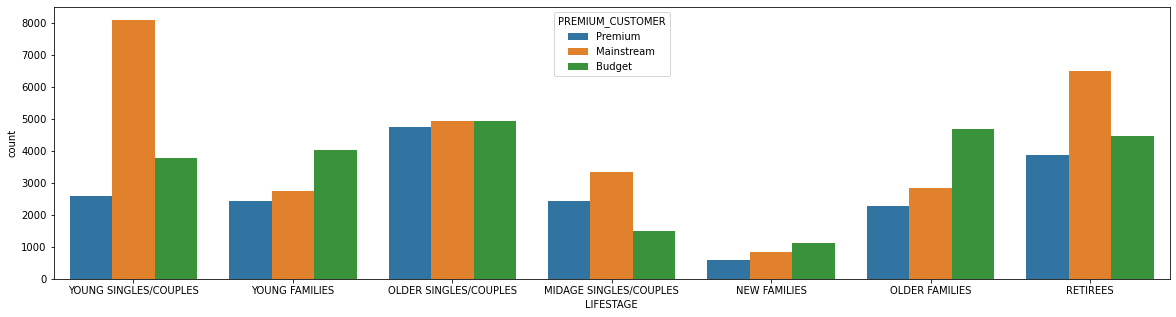

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x='LIFESTAGE',data=purchase,hue='PREMIUM_CUSTOMER')
#Family would prefer to budget and the rest is mainstream is the main customer

In [18]:
import plotly.graph_objects as go
import plotly.express as px

<AxesSubplot:xlabel='PROD_WEIGHT', ylabel='count'>

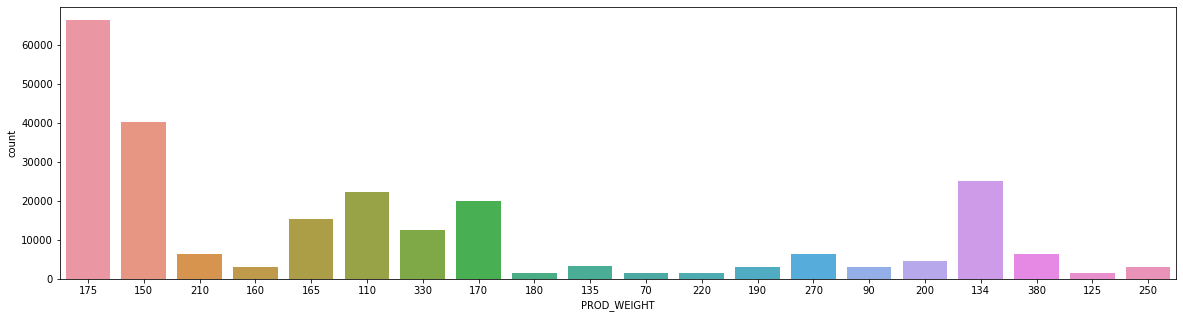

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='PROD_WEIGHT',data=chips)
#175 & 150 g package are popular 

<AxesSubplot:xlabel='PROD_WEIGHT', ylabel='count'>

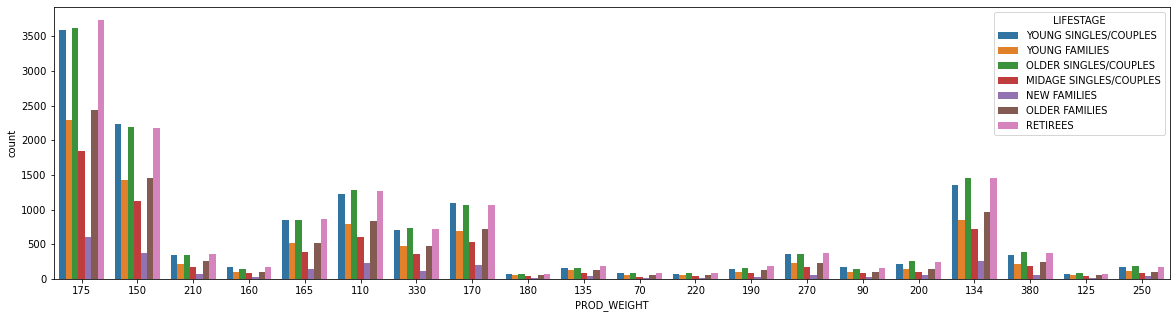

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x='PROD_WEIGHT',data=both,hue='LIFESTAGE')

<AxesSubplot:xlabel='PROD_BRAND', ylabel='count'>

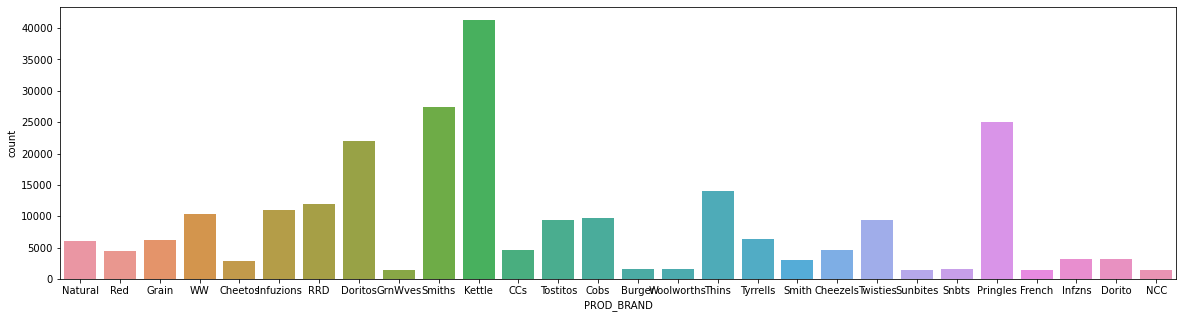

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(x='PROD_BRAND',data=chips)
#Kettle is the most popular in total data

<AxesSubplot:xlabel='PROD_BRAND', ylabel='count'>

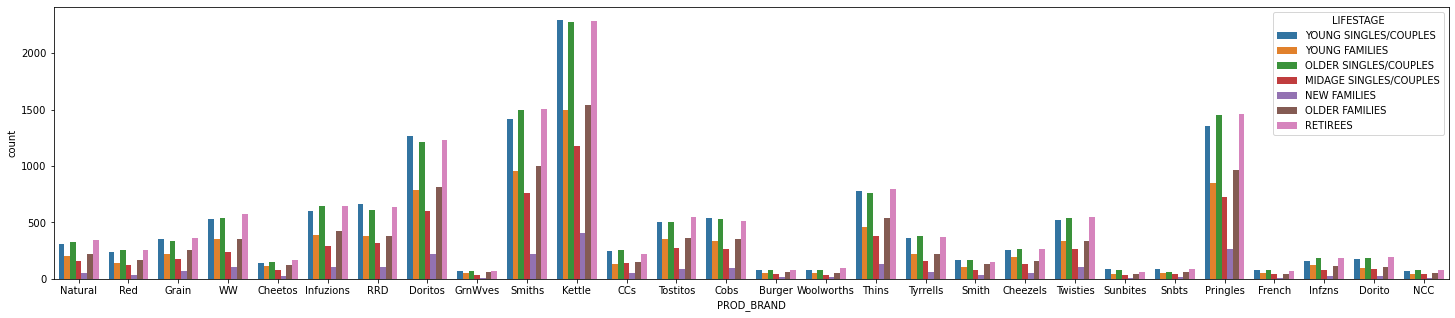

In [22]:
plt.figure(figsize=(25,5))
sns.countplot(x='PROD_BRAND',data=both,hue='LIFESTAGE')

## Conclusion
Small packages are more popular to customers and single/couples and retires are the main customers of the chips. 
It is recommanded that the retail stores can promote small package chips to customers with sell events. 

The popular chips brand are Kettle, Smiths and Ptingles, which can have more on stores since it can bring more profits. 